# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)  Project 2:  Ames Housing Data and Kaggle Challenge
Creating and Tuning a Linear Regression Model to Predict Housing Prices in Ames, IA



# Technical Report:

This notebook reflects the import, cleaning, preprocessing and modeling of training and test datasets.

### EDA & Cleaning
 - drop and impute nulls
 - drop outliers

### Preprocessing
 - use pd.get_dummies to convert categorical data into 1's and 0's (so it can be fed into a classification algorithm) 

### Feature Extraction and Engineering
 - observe correlation between features and sales price
 - The top 10 Features most closely correlated to sale price of a home in Ames, IA include:
    - Overall Quality
    - Gross Living Area
    - Garage Cars
    - Year Built
    - Garage Area
    - Full Bath
    - Total Basement Square Footage
    - Year of Remodel/Addition
    - Foundation
    - 1st Floor Square Footage

### Modeling
 - get baseline prediction  (181356.45) 
 - split data into train and test sets *(NOTE: test dataset does not include the target (Sales Price), which is what we are trying to predict in our Regression model)*
 - "standardize" or scale features with StandardScaler to assign a "z-score" 
 - instantiate & cross validate regression models:
    - linear regression model (-5.81)
    - lasso model (0.78)
    - ridge model (0.80)
 - fit scaled training data to Ridge (model with the score closest to 1)
 - evaluate resulting train and test scores
    - scaled training data score (0.92)
    - scaled training data score (0.90)
 - make prediction based on scaled test data (result is an array of price predictions for every observation)
 - find the R2 score (90.7) which represents the percentage of explained variance in my model

While training and test scores are relatively close together, my model is still overfit and could use additional tuning.

# Data Description

There are three files:

- `train.csv` -- contains all of the training data for the model. The target variable (SalePrice) is removed from the test set!
- `test.csv` -- contains the test data for the model. Data will be fed into the regression model to make predictions.
- `sample_sub_reg.csv` -- An example of a correctly formatted submission for the Kaggle challenge (with a random number provided as predictions for SalePrice). 


# Data Dictionary


- [Data Dictionary & References](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)


## Data Import and Cleaning

In [3]:
!pwd

/Users/ngms/GA-DSI/SUBMISSIONS/Project_2/code


#### 1. Import  Data

Two datasets were provided: `train.csv` and `test.csv`:
- [Model Training Dataset](../data/train.csv)
- [Model Test Dataset](../data/test.csv)

Detailed information can be found here:
- [Data Dictionary & References](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)


In [1]:
# Importing required Python libraries used for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import training and testing datasets

# Load `train.csv` file into pandas dataframe: `ames_train`
ames_train = pd.read_csv('../data/train.csv')

# Load `test.csv` file into pandas dataframe: `ames_test`
ames_test = pd.read_csv('../data/test.csv')

#### 2. Display Data

Review the first 10 rows of each dataframe.

In [4]:
# Profile first 10 rows of `ames_train` dataframe
print('Dataframe:  ames_train')
ames_train.head(10)

Dataframe:  ames_train


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [5]:
# Profile first 10 rows of `ames_test` dataframe
print('Dataframe:  ames_test')
ames_test.head(10)

Dataframe:  ames_test


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
5,333,923228370,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,6,2010,WD
6,1327,902427150,20,RM,52.0,8516,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,5,2008,WD
7,858,907202130,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,10,2009,WD
8,95,533208090,160,FV,39.0,3515,Pave,Pave,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,1,2010,WD
9,1568,914476010,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,2,2008,WD


In [8]:
# Review and compare number of rows and columns in each dataframe

print('ames_train rows by columns:  ', ames_train.shape) 
print('ames_test rows by columns:  ', ames_test.shape)

ames_train rows by columns:   (2051, 81)
ames_test rows by columns:   (879, 80)


#### 3. Verbally Describe Data

An initial review of the data shows that:
- `ames_train` has one more column than `ames_test`; *Sale Price* (our target) is omitted from test data
- `ames_train` has 2,051 observations (houses)
- `ames_test` data is limited (only 879 observations)
- *Sale Condition* is not included in either dataset


## Exploratory Data Analysis (EDA)


In [6]:
# Review dataframe structure
# Train
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [7]:
# Identify duplicate rows in the dataset
# Train: there are no dupes
ames_train_dupes = ames_train[ames_train.duplicated()]
ames_train_dupes


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [8]:
# define eda function to look for basic anomalies (missing/corrupt data, incorrect data types, etc.)
# eda(dataframe) function logic provided by Adi Bronshtein!!; modified to transpose describe...
def eda(dataframe):
    print("missing values: {}".format(dataframe.isnull().sum()))
    print("dataframe index: {}".format(dataframe.index))
    print("dataframe types: {}".format(dataframe.dtypes))
    print("dataframe shape: {}".format(dataframe.shape))
    print("dataframe describe: {}".format(dataframe.describe().transpose()))

    for item in dataframe:
        print(item)
        print(dataframe[item].nunique())

In [9]:
# invoke eda function to look for basic anomalies (missing/corrupt data, incorrect data types, etc.)
# Train:  invoke eda function:
eda(ames_train)

missing values: Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64
dataframe index: RangeIndex(start=0, stop=2051, step=1)
dataframe types: Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object
dataframe shape: (2051, 81)
dataframe describe:                   count          mean           std          min          25%  \
Id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
PID              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
MS SubClass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
Lot 

# Null Values

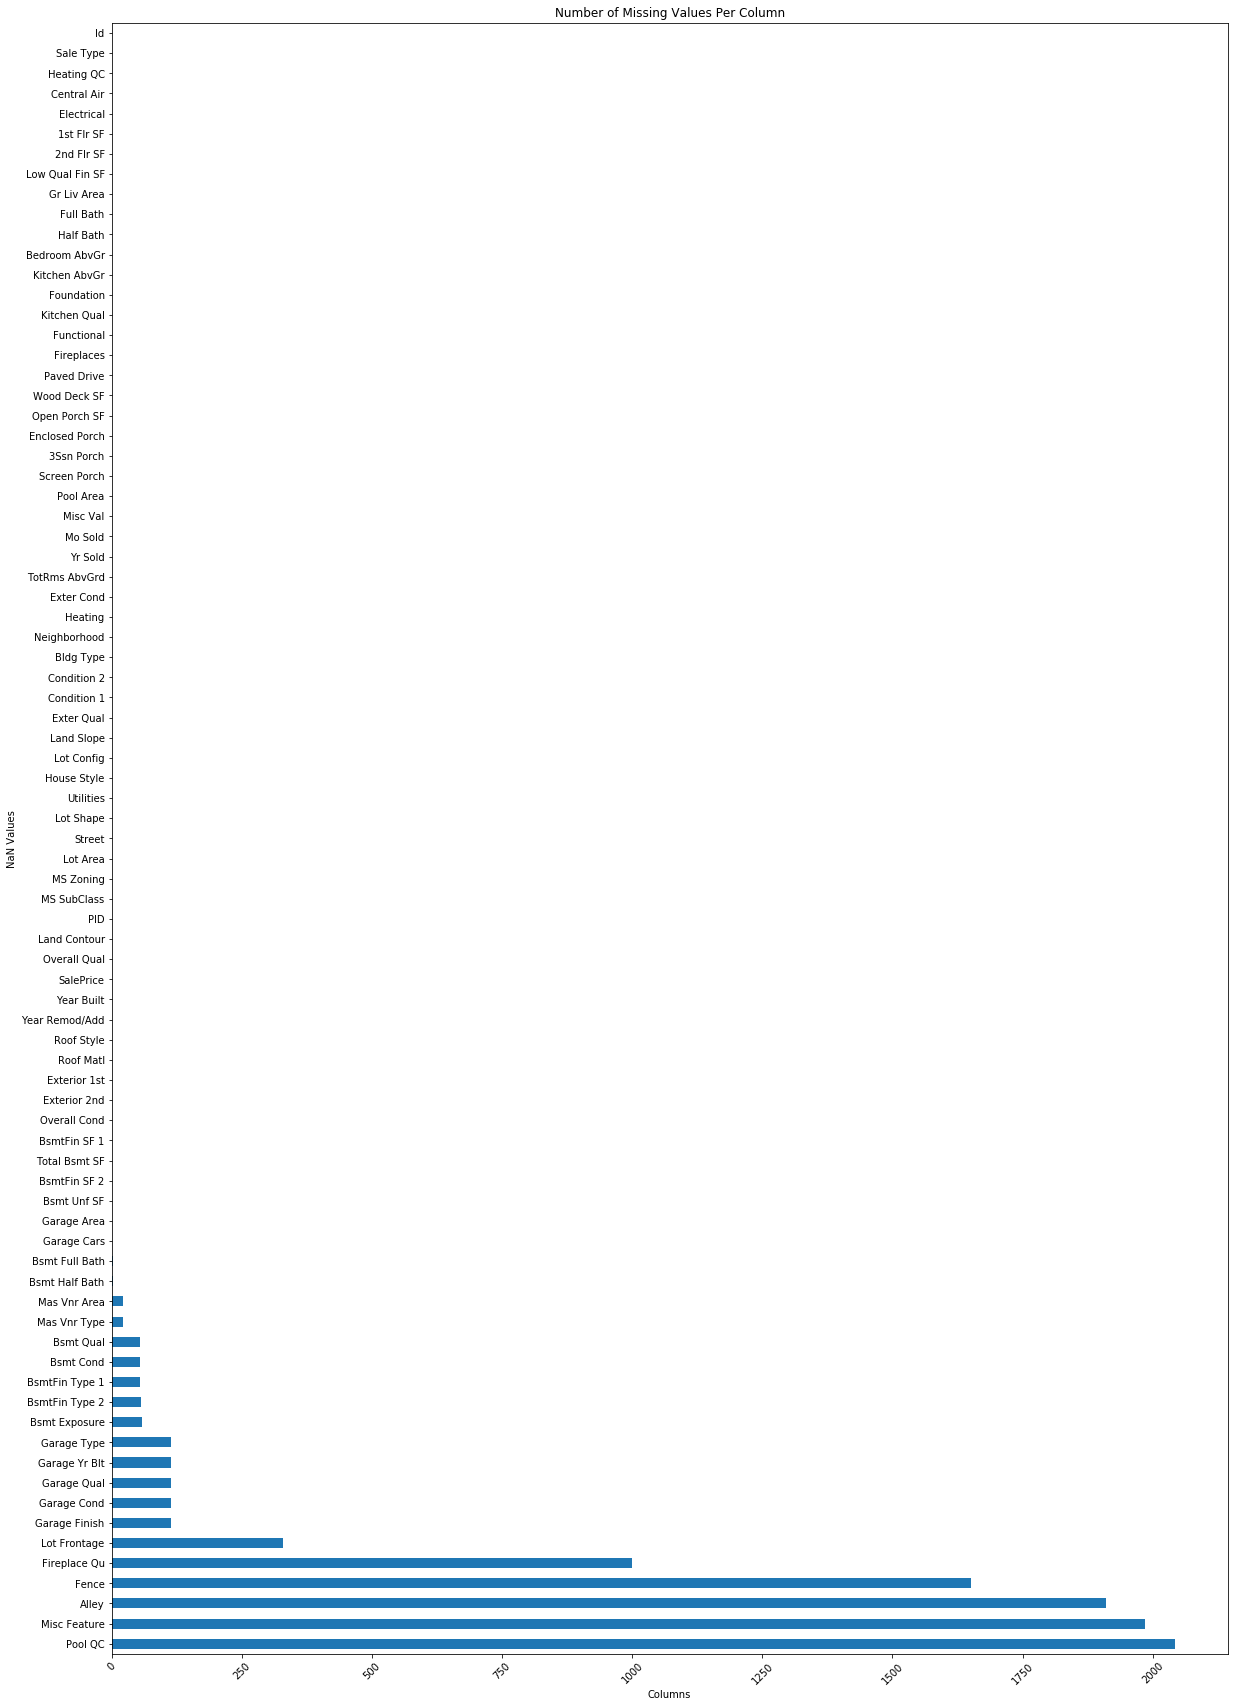

In [10]:
# Visualize nulls by column...
# 1. Create a bar chart showing how many missing values are in each column
plt.figure(figsize=(20,30))

ames_train.isnull().sum().sort_values(ascending=False).plot(kind='barh')
# Add a title and show the plot.
plt.title('Number of Missing Values Per Column')
# Create tick mark labels on the Y axis and rotate them.
plt.xticks(rotation = 45)
# Create X axis label.
plt.xlabel("Columns")
# Create Y axis label.
plt.ylabel("NaN Values");

# Data Cleaning  (Train)

In [11]:
# Create copy of dataframe for cleaning
# Train
ames_train_clean = pd.DataFrame(ames_train)

# verify shape of original and new dataframes match
print(ames_train_clean.shape)
print(ames_train.shape)


(2051, 81)
(2051, 81)


In [12]:
# start cleaning new dataframe...
# drop these ROWS with nulls
ames_train_clean.dropna(axis=0, subset=['Bsmt Half Bath'], inplace=True)
ames_train_clean.dropna(axis=0, subset=['Bsmt Full Bath'], inplace=True)
ames_train_clean.dropna(axis=0, subset=['Garage Cars'], inplace=True)
ames_train_clean.dropna(axis=0, subset=['Garage Area'], inplace=True)
ames_train_clean.dropna(axis=0, subset=['Bsmt Unf SF'], inplace=True)
ames_train_clean.dropna(axis=0, subset=['Total Bsmt SF'], inplace=True)
ames_train_clean.dropna(axis=0, subset=['BsmtFin SF 1'], inplace=True)

# verify new dataframe now has fewer rows...
print(ames_train_clean.shape)
print(ames_train.shape)


(2048, 81)
(2051, 81)


In [13]:
# continue cleaning new dataframe...
# drop these COLUMNS with many nulls
ames_train_clean.drop(columns='Pool QC', inplace=True)
ames_train_clean.drop(columns='Misc Feature', inplace=True)
ames_train_clean.drop(columns='Alley', inplace=True)
ames_train_clean.drop(columns='Fence', inplace=True)
ames_train_clean.drop(columns='Fireplace Qu', inplace=True)
ames_train_clean.drop(columns='Lot Frontage', inplace=True)
ames_train_clean.drop(columns='Garage Finish', inplace=True)
ames_train_clean.drop(columns='Garage Cond', inplace=True)
ames_train_clean.drop(columns='Garage Qual', inplace=True)
ames_train_clean.drop(columns='Garage Yr Blt', inplace=True)
ames_train_clean.drop(columns='Garage Type', inplace=True)
ames_train_clean.drop(columns='Bsmt Exposure', inplace=True)
ames_train_clean.drop(columns='BsmtFin Type 2', inplace=True)
ames_train_clean.drop(columns='BsmtFin Type 1', inplace=True)
ames_train_clean.drop(columns='Bsmt Cond', inplace=True)
ames_train_clean.drop(columns='Bsmt Qual', inplace=True)
ames_train_clean.drop(columns='Mas Vnr Type', inplace=True)
ames_train_clean.drop(columns='Mas Vnr Area', inplace=True)

# verify new dataframe now has fewer rows...
print(ames_train_clean.shape)
print(ames_train.shape)


(2048, 63)
(2051, 81)


In [14]:
# verify no more nulls...
print(ames_train_clean.isnull().sum().sort_values(ascending=False))


SalePrice       0
House Style     0
BsmtFin SF 2    0
BsmtFin SF 1    0
Foundation      0
               ..
2nd Flr SF      0
1st Flr SF      0
Electrical      0
Central Air     0
Id              0
Length: 63, dtype: int64


In [15]:
ames_train_clean.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,...,59,0,0,0,0,0,3,2010,WD,138500


# Outliers...

In [16]:
# Summary Statistics
# Train
ames_train_clean.describe()


,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2048.000000,2.048000e+03,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,...,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,1473.713867,7.133064e+08,57.038574,10049.675293,6.114258,5.560547,1971.751465,1984.193848,442.464844,48.005859,...,93.886230,47.444824,22.501465,2.595215,16.535645,2.401367,51.649902,6.222168,2007.775879,181484.252441
std,844.425431,1.886843e+08,42.839004,6697.167566,1.426126,1.104349,30.174112,21.033925,461.319862,165.074675,...,128.597923,66.393358,59.738209,25.247901,57.412746,37.810135,573.810601,2.745331,1.312844,79248.657891
min,1.000000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,752.750000,5.284581e+08,20.000000,7500.000000,5.000000,5.000000,1954.000000,1964.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129837.500000
50%,1483.500000,5.354532e+08,50.000000,9432.000000,6.000000,5.000000,1974.000000,1993.000000,368.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2197.500000,9.071770e+08,70.000000,11512.750000,7.000000,6.000000,2001.000000,2004.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [17]:
# Sales price outliers:
# min       12,789
# max      611,657
ames_train_clean['SalePrice'].describe()


count      2048.000000
mean     181484.252441
std       79248.657891
min       12789.000000
25%      129837.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [18]:
# drop outliers
# Train
# ames_train[ames_train.SalePrice = ames_train['SalePrice'].max()]

# Get index for max outlier
index_max = ames_train_clean[ ames_train_clean['SalePrice'] == ames_train_clean['SalePrice'].max()].index
index_max
# Get index for min outlier
index_min = ames_train_clean[ ames_train_clean['SalePrice'] == ames_train_clean['SalePrice'].min()].index
index_min

# Delete these row indexes from dataFrame
ames_train_clean.drop(index_max, inplace=True)
ames_train_clean.drop(index_min, inplace=True)


In [19]:
# verify new dataframe now has fewer rows...
print(ames_train_clean.shape)
print(ames_train.shape)



(2046, 63)
(2051, 81)


# Data Cleaning  (Test)

In [20]:
# Review dataframe structure
# Test
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [21]:
# Identify duplicate rows in the dataset
# Test: there are no dupes
ames_test_dupes = ames_test[ames_test.duplicated()]
ames_test_dupes


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type


In [22]:
# Create copy of dataframe for cleaning
# Test
ames_test_clean = pd.DataFrame(ames_test)

# verify shape of original and new dataframes match
print(ames_test_clean.shape)
print(ames_test.shape)


(879, 80)
(879, 80)


In [23]:
# start cleaning new dataframe...
# Test
# drop these COLUMNS with many nulls
ames_test_clean.drop(columns='Pool QC', inplace=True)
ames_test_clean.drop(columns='Misc Feature', inplace=True)
ames_test_clean.drop(columns='Alley', inplace=True)
ames_test_clean.drop(columns='Fence', inplace=True)
ames_test_clean.drop(columns='Fireplace Qu', inplace=True)
ames_test_clean.drop(columns='Lot Frontage', inplace=True)
ames_test_clean.drop(columns='Garage Finish', inplace=True)
ames_test_clean.drop(columns='Garage Cond', inplace=True)
ames_test_clean.drop(columns='Garage Qual', inplace=True)
ames_test_clean.drop(columns='Garage Yr Blt', inplace=True)
ames_test_clean.drop(columns='Garage Type', inplace=True)
ames_test_clean.drop(columns='Bsmt Exposure', inplace=True)
ames_test_clean.drop(columns='BsmtFin Type 2', inplace=True)
ames_test_clean.drop(columns='BsmtFin Type 1', inplace=True)
ames_test_clean.drop(columns='Bsmt Cond', inplace=True)
ames_test_clean.drop(columns='Bsmt Qual', inplace=True)
ames_test_clean.drop(columns='Mas Vnr Type', inplace=True)
ames_test_clean.drop(columns='Mas Vnr Area', inplace=True)

# verify new dataframe now has fewer rows...
print(ames_test_clean.shape)
print(ames_test_clean.shape)

(879, 62)
(879, 62)


In [24]:
###################
# CAN'T DROP ROWS!!!
##################
# impute these ROWS with nulls

# replacing na values in college with No college 
ames_test_clean["Bsmt Half Bath"].fillna("No_Bsmt Half Bath", inplace = True) 
ames_test_clean["Bsmt Full Bath"].fillna("No_Bsmt Full Bath", inplace = True) 
ames_test_clean["Garage Cars"].fillna("No_Garage Cars", inplace = True) 
ames_test_clean["Garage Area"].fillna("No_Garage Area", inplace = True) 
ames_test_clean["Bsmt Unf SF"].fillna("No_Bsmt Unf SF", inplace = True) 
ames_test_clean["Total Bsmt SF"].fillna("No_Total Bsmt SF", inplace = True) 
ames_test_clean["BsmtFin SF 1"].fillna("BsmtFin SF 1", inplace = True) 
ames_test_clean["Electrical"].fillna("Electrical", inplace = True) 

# verify new dataframe now has fewer rows...
print(ames_test_clean.shape)
print(ames_test_clean.shape)

(879, 62)
(879, 62)


In [25]:
# verify no more nulls...
print(ames_test_clean.isnull().sum().sort_values(ascending=False))


Sale Type       0
House Style     0
BsmtFin SF 2    0
BsmtFin SF 1    0
Foundation      0
               ..
2nd Flr SF      0
1st Flr SF      0
Electrical      0
Central Air     0
Id              0
Length: 62, dtype: int64


In [26]:
ames_test_clean.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,9142,Pave,Reg,Lvl,AllPub,Inside,...,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,9662,Pave,IR1,Lvl,AllPub,Inside,...,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,17104,Pave,IR1,Lvl,AllPub,Inside,...,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,8520,Pave,Reg,Lvl,AllPub,Inside,...,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,9500,Pave,IR1,Lvl,AllPub,Inside,...,0,76,0,0,185,0,0,7,2009,WD


In [27]:
# Change catagorical objects (create dummies) and drop originals simultaneously
# code by Sade Ekulona
ames_test_clean = pd.get_dummies(ames_test_clean, drop_first = True)

In [28]:
# verify no more objects...
ames_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Columns: 181 entries, Id to Sale Type_WD 
dtypes: int64(35), uint8(146)
memory usage: 365.8 KB


In [29]:
ames_test_clean.shape

(879, 181)

# Preprocessing and Modeling

## Catagorical variables

In [30]:
# In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using pd.get_dummies
# There are many columns with "object" data type which must be addressed
ames_train_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2050
Data columns (total 63 columns):
Id                 2046 non-null int64
PID                2046 non-null int64
MS SubClass        2046 non-null int64
MS Zoning          2046 non-null object
Lot Area           2046 non-null int64
Street             2046 non-null object
Lot Shape          2046 non-null object
Land Contour       2046 non-null object
Utilities          2046 non-null object
Lot Config         2046 non-null object
Land Slope         2046 non-null object
Neighborhood       2046 non-null object
Condition 1        2046 non-null object
Condition 2        2046 non-null object
Bldg Type          2046 non-null object
House Style        2046 non-null object
Overall Qual       2046 non-null int64
Overall Cond       2046 non-null int64
Year Built         2046 non-null int64
Year Remod/Add     2046 non-null int64
Roof Style         2046 non-null object
Roof Matl          2046 non-null object
Exterior 1st       20

In [31]:
# Change catagorical objects (create dummies) and drop originals simultaneously
# code by Sade Ekulona
ames_train_clean = pd.get_dummies(ames_train_clean, drop_first = True)

In [32]:
# verify no more objects...
ames_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2050
Columns: 193 entries, Id to Sale Type_WD 
dtypes: float64(8), int64(28), uint8(157)
memory usage: 905.1 KB


In [33]:
ames_train_clean.head()

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,13517,6,8,1976,2005,533.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,544,531379050,60,11492,7,5,1996,1997,637.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,153,535304180,20,7922,5,7,1953,2007,731.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,318,916386060,60,9802,5,5,2006,2007,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,255,906425045,50,14235,6,8,1900,1993,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


# CORRELATION

In [34]:
import seaborn as sns

In [35]:
# Observe correlation between features and sales price
ames_train_clean.corr().head()

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,1.000000,0.175812,0.025223,0.033422,-0.062056,-0.029163,-0.064193,-0.090225,-0.043791,0.000398,...,0.025386,-0.065937,0.039310,-0.029751,-0.037327,-0.047979,-0.001493,0.106644,-0.029843,-0.050346
PID,0.175812,1.000000,-0.003039,0.022177,-0.263316,0.107202,-0.345283,-0.176046,-0.084293,-0.012861,...,0.114285,-0.239615,0.002791,0.001240,0.026582,-0.023845,0.050484,-0.140167,0.023165,0.101348
MS SubClass,0.025223,-0.003039,1.000000,-0.245247,0.035048,-0.070601,0.035798,0.044682,-0.060258,-0.068596,...,-0.038443,-0.009606,-0.006658,-0.002139,0.041045,-0.009670,-0.004702,-0.054300,-0.017636,0.064244
Lot Area,0.033422,0.022177,-0.245247,1.000000,0.108137,-0.022482,0.036801,0.048995,0.219689,0.042846,...,0.017014,-0.006472,0.008477,0.010658,-0.007672,-0.001340,-0.007296,0.042898,-0.011432,-0.026940
Overall Qual,-0.062056,-0.263316,0.035048,0.108137,1.000000,-0.085847,0.601526,0.584833,0.275382,-0.028641,...,-0.091685,0.317747,0.018980,0.019767,-0.073498,0.018811,-0.031840,0.333432,-0.050257,-0.194784


In [36]:
ames_train_clean.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.602223
Kitchen Qual_TA     -0.541705
Foundation_CBlock   -0.357922
Heating QC_TA       -0.344196
Lot Shape_Reg       -0.305152
                       ...   
Garage Cars          0.650001
Garage Area          0.653396
Gr Liv Area          0.698686
Overall Qual         0.801711
SalePrice            1.000000
Name: SalePrice, Length: 193, dtype: float64

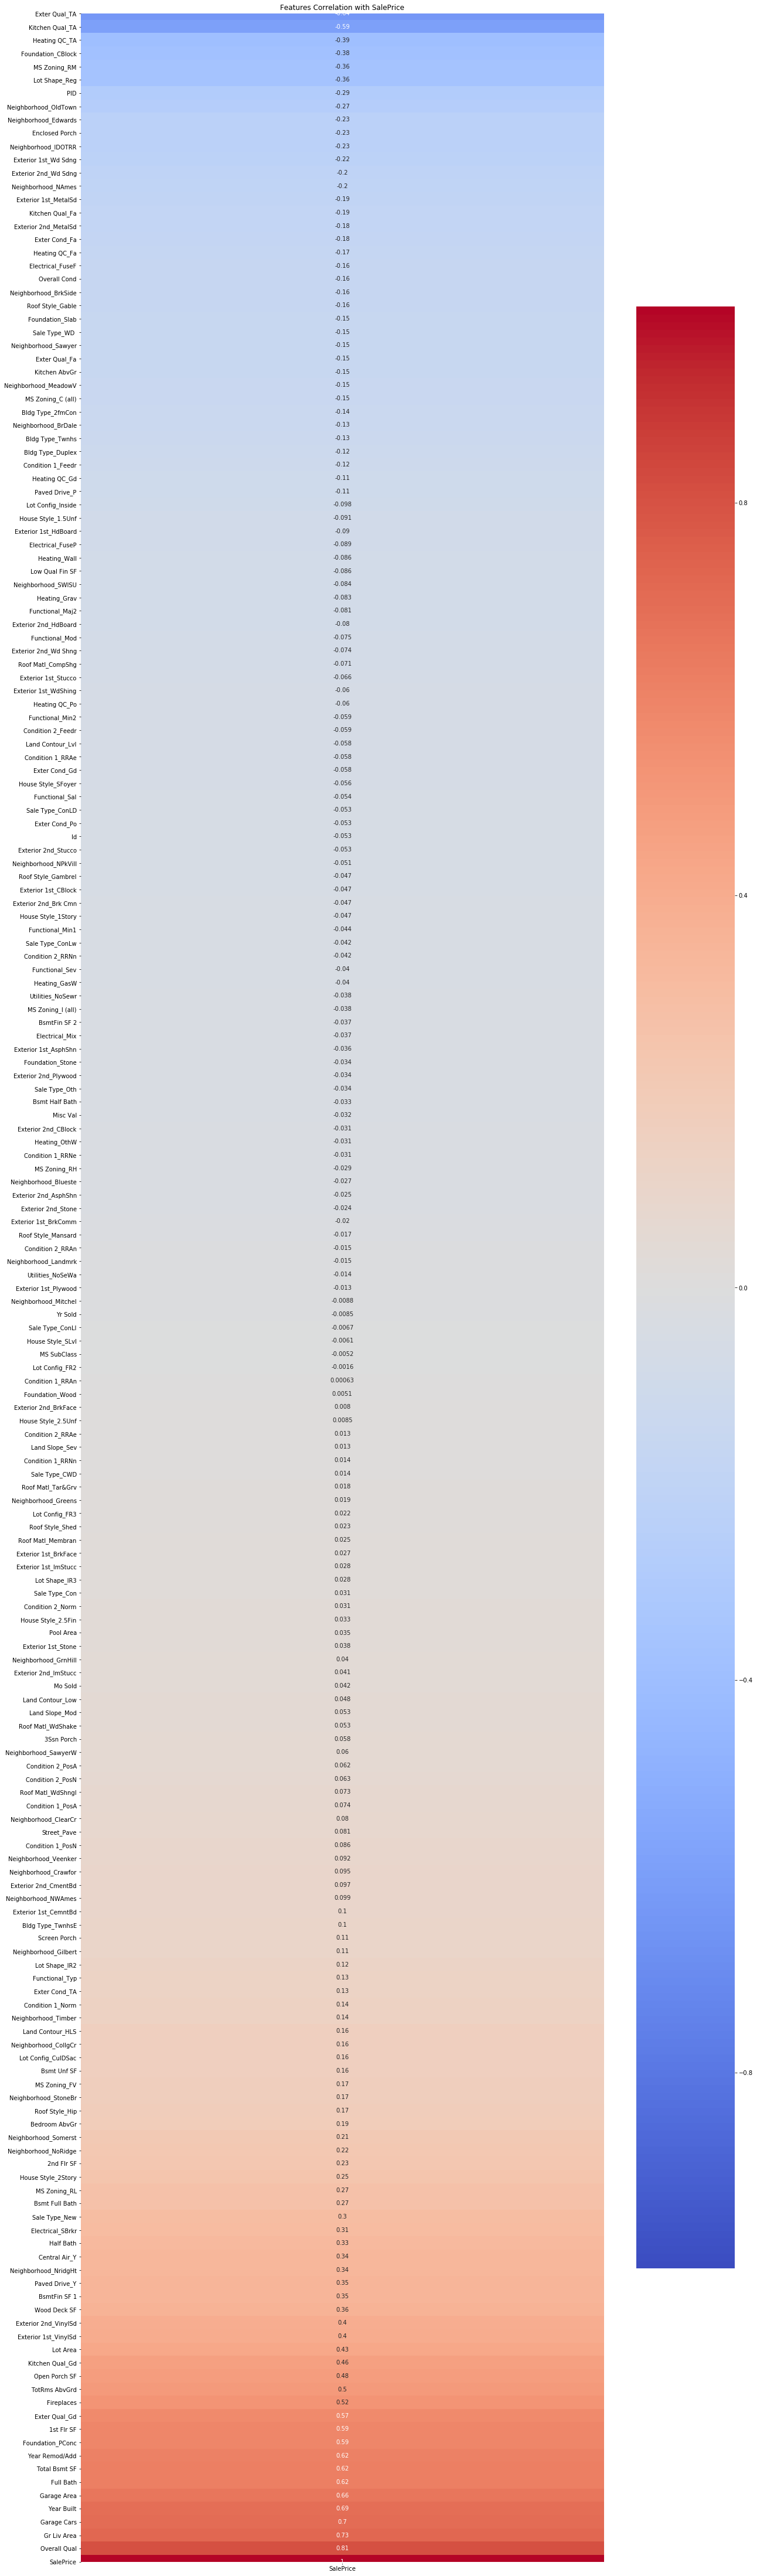

In [37]:
# Observe correlation between features and sales price
# Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features
# code by Sade Ekulona
plt.figure(figsize=(20,80))
ax=plt.axes()
ax.set_title("Features Correlation with SalePrice")
sns.heatmap(ames_train_clean.corr(method='spearman')[['SalePrice']].sort_values(by='SalePrice'), 
              cmap='coolwarm', annot=True, vmin=-1);

# FEATURE EXTRACTION / ENGINEERING...

# Modeling...

In [37]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

# Create features matrix (X) target vector (y)

In [38]:
# Create features dataframe
# code from lesson 3.07
features = [col for col in ames_train_clean._get_numeric_data().columns if col != 'SalePrice']
X = ames_train_clean[features]  #predictor
y = ames_train_clean['SalePrice']  #prediction


In [39]:
# get baseline prediction
y.mean()

181356.45307917887

In [41]:
# split data into train and test sets
# training is 75% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [42]:
# more pre-processing:
# use StandardScaler to "standardize" or scale features
# by fitting to X_train and transforming X_train and X_test.
# This will assign a "z-score" to all features

# instantiate scaler
sc = StandardScaler()
# fit training data
sc.fit(X_train)  #DO NOT FIT TEST
# transform training data
X_train_sc = sc.transform(X_train)
# transform test data
X_test_sc = sc.transform(X_test)


/Users/ngms/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ngms/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/Users/ngms/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


# instantiate regression models

In [43]:
# linear regression model
lr = LinearRegression()

In [44]:
# lasso model
lasso = LassoCV(n_alphas=200)

In [45]:
# ridge model
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [46]:
# cross validate all models  (using scaled data)
# linear regression score
lr_scores = cross_val_score(lr, X_train_sc, y_train, cv=3)
lr_scores.mean()

-5.81263613431827e+21

In [47]:
# Lasso score
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=3)
lasso_scores.mean()

/Users/ngms/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ngms/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ngms/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7845823578162272

In [48]:
# Ridge score
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=3)
ridge_scores.mean()

0.8013111798364733

In [ ]:
# choose the model with the score closest to 1: Ridge
# then fit model to train; evaluate resulting train and test scores

In [49]:
# fit scaled training data to Ridge model
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  0.2, ...,  9.9, 10. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [50]:
# score scaled training data
ridge.score(X_train_sc, y_train)

0.9214036538155367

In [51]:
# score scaled test data
ridge.score(X_test_sc, y_test)

0.9076538115998489

In [52]:
# average
ridge_scores.mean()

0.8013111798364733

In [53]:
# make prediction based on scaled test data
# result is an array of price predictions for every observation...
pred = ridge.predict(X_test_sc)

In [55]:
# represents the percentage of explained variance in my model
r2_score(y_test, pred)

0.9076538115998488

# Kaggle Submission Steps

In [70]:
# Training data
ybar = ames_train_clean.SalePrice.mean()
ybar

181356.45307917887

In [71]:
# Test data
submission_pd = pd.DataFrame(ames_test_clean.Id)

In [72]:
submission_pd.head(5)

,Id
0,2658
1,2718
2,2414
3,1989
4,625


In [73]:
submission_pd['SalePrice'] = ybar

In [74]:
submission_pd.head(5)

,Id,SalePrice
0,2658,181356.453079
1,2718,181356.453079
2,2414,181356.453079
3,1989,181356.453079
4,625,181356.453079


In [79]:
# export submission file
submission_pd.to_csv('submission0.csv')

In [80]:
import os
# print(os.listdir("../input"))

In [81]:
os.listdir()

['Ames_all.ipynb',
 '02_Ames_EDA_and_Cleaning.ipynb',
 'submission.csv',
 'Ames_Housing_Price_Prediction_Model.ipynb',
 'submission0.csv',
 '.ipynb_checkpoints',
 'ames_train_info.csv',
 '03_Ames_Feature_Engineering.ipynb']

In [82]:
submission_pd.to_csv('submission.csv', index=False)